#Relatório - Segunda Atividade de Aprendizado de Máquina
Análise de Dados

Ivo Aguiar Pimenta

Curso de Ciência da Computação - UECE

aguiar.pimenta@aluno.uece.br

#Resumo

Neste trabalho iremos praticar a redução de dimensionalidade. Iremos utilizar a técnica Chi Square para selecionar features de uma forma mais inteligente e praticar a técnia PCA (Principal Component Analyses).

#1 Introdução

Neste trabalho iremos utilizar a bse de dados disponibilizada pelo Kaggle "water_potability.csv" para que possamos fazer uma análise sobre o método de escolha de caractrísticas que utilizamos no trabalho anterior e compararmos com o método Shi Square que usaremos neste trabalho.

Também iremos aplicar na prática a técnica PCA (Principal Component Analyses), uma técnica utilizada para redução de dimensionalidade, uma técnica que diminui o número de variáveis do nosso sistema original, mas mantém as mesmas caractrísticas do mesmo.

#2 Redução de Dimensionalidade

A motivação para usarmos técnicas de redução de dimensionalidade é porque de modo geral o desempenho de um classificador tende a degradar a partir de um certo número de características, independente destas características sejam úteis para a aálise da dados.

Para efetuarmos a redução de dimensionalidade praticamente utilizamos dois métodos: Extração de Características e seleção de características.

Os algoritmos de extração de características criam novas características a partir de transformações ou da combinação do conjunto de características original.

Os algoritmos de seleção de características selecionam, segundo determinado critério, o melhor subconjunto do conjunto de características original. Freqüentemente extração de características precede seleção de características, de forma que, inicialmente é feita a extração de características a partir dos dados de entrada, a seguir um algoritmo de seleção de características elimina os atributos mais irrelevantes segundo um determinado critério, reduzindo a dimensionalidade.




# 3 Seleção de Atributos

Existem dois tipos de testes qui-quadrado. Ambos usam a estatística e a distribuição do qui-quadrado para diferentes propósitos:

Um teste de ajuste qui-quadrado determina se os dados da amostra correspondem a uma população. Para obter mais detalhes sobre esse tipo, consulte: Teste de qualidade do ajuste.

Um teste qui-quadrado para independência compara duas variáveis ​​em uma tabela de contingência para ver se elas estão relacionadas. Em um sentido mais geral, ele testa para ver se as distribuições de variáveis ​​categóricas diferem umas das outras.

Uma estatística qui-quadrado é uma maneira de mostrar uma relação entre duas variáveis ​​categóricas. Em estatística, existem dois tipos de variáveis: variáveis ​​numéricas (contáveis) e variáveis ​​não numéricas (categóricas). A estatística qui-quadrado é um número único que informa quanta diferença existe entre suas contagens observadas e as contagens que você esperaria se não houvesse nenhuma relação na população.

#Pegando a base de dados

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


#Chi Square

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as np

Tirar os NaN

In [4]:
df = df.dropna().reset_index(drop=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


Nó iremos definir primeiro X e Y

In [5]:
x = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']

Selecionar com o chi2


In [6]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)
X_new=test.fit_transform(x, y)
X_new

array([[2.20184174e+04, 3.56886136e+02, 3.63266516e+02, 1.00341674e+02],
       [1.79789863e+04, 3.10135738e+02, 3.98410813e+02, 3.19979927e+01],
       [2.87486877e+04, 3.26678363e+02, 2.80467916e+02, 5.49178618e+01],
       ...,
       [3.71888260e+04, 2.58930600e+02, 4.39893618e+02, 4.15585007e+01],
       [2.61387802e+04, 3.45700257e+02, 4.15886955e+02, 6.04199211e+01],
       [4.75809916e+04, 3.59948574e+02, 5.26424171e+02, 6.66876948e+01]])

In [7]:
X_new.shape

(2011, 4)

As colunas que foram escolhidas

In [8]:
x.columns[test.get_support(indices=True)].tolist()

['Solids', 'Sulfate', 'Conductivity', 'Trihalomethanes']

#PCA

Importa as bibliotecas

In [9]:
from sklearn.decomposition import PCA
import numpy as np

Iniciar O PCA

In [10]:
pca_water = PCA(n_components=4)

In [11]:
PCA_water_cfit = pca_water.fit(x)
PCA_water_trans = PCA_water_cfit.transform(x)



In [12]:
PCA_water_cfit

PCA(n_components=4)

In [13]:
PCA_water_trans

array([[ 1.00956014e+02, -6.33852487e+01, -1.74158110e+01,
         2.32586109e+01],
       [-3.93843051e+03, -2.81226885e+01,  2.15973902e+01,
        -2.08713452e+01],
       [ 6.83125823e+03, -1.45752257e+02,  1.46639780e+00,
        -5.81927058e+00],
       ...,
       [ 1.52714577e+04,  1.42473082e+01,  3.64047720e+01,
        -1.09880369e+02],
       [ 4.22133035e+03, -1.06779874e+01, -1.72498777e+01,
        -4.28190885e+00],
       [ 2.56635168e+04,  1.00599248e+02, -4.58488157e+01,
         1.37608332e+01]])

#Matriz de Covariancia

In [14]:
cov_matrix = np.cov(PCA_water_trans)
df.cov()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,2.475388,5.594047,-1.191314e+03,-0.061759,0.682289,1.794068,0.148439,0.462334,-0.044014,0.011217
Hardness,5.594047,1065.048742,-1.502397e+04,-1.173283,-145.931394,30.898985,1.434925,-8.080239,-0.887028,-0.024100
Solids,-1191.314479,-15023.968352,7.468831e+07,-709.323403,-57962.923960,-3625.703522,-157.584560,-2176.917551,130.895988,172.481345
Chloramines,-0.061759,-1.173283,-7.093234e+02,2.511654,0.408407,-3.617004,-0.125453,0.381933,0.016246,0.016162
Sulfate,0.682289,-145.931394,-5.796292e+04,0.408407,1697.866203,-53.851912,3.668399,-15.466391,-0.319417,-0.309407
Conductivity,1.794068,30.898985,-3.625704e+03,-3.617004,-53.851912,6514.519345,4.199049,6.343406,0.786975,-0.613691
Organic_carbon,0.148439,1.434925,-1.575846e+02,-0.125453,3.668399,4.199049,11.055350,-0.302960,-0.040031,-0.025397
Trihalomethanes,0.462334,-8.080239,-2.176918e+03,0.381933,-15.466391,6.343406,-0.302960,258.473449,-0.257154,0.072924
Turbidity,-0.044014,-0.887028,1.308960e+02,0.016246,-0.319417,0.786975,-0.040031,-0.257154,0.608940,0.008685
Potability,0.011217,-0.024100,1.724813e+02,0.016162,-0.309407,-0.613691,-0.025397,0.072924,0.008685,0.240765


#Autovalores e Autovetores

In [16]:
autoValor, autoVetor = np.linalg.eig(cov_matrix)



In [17]:
autoValor

array([ 3.75314149e+10+0.00000000e+00j,  3.22046084e+06+0.00000000e+00j,
        9.02099755e+05+0.00000000e+00j, ...,
        5.27831681e-13-1.79569372e-12j, -4.06542242e-13+1.19327326e-12j,
       -4.06542242e-13-1.19327326e-12j])

In [18]:
autoVetor

array([[-3.10065826e-04+0.00000000e+00j,  1.68726843e-02+0.00000000e+00j,
         1.92947244e-02+0.00000000e+00j, ...,
         1.31182713e-04-4.60352056e-04j,  6.81306723e-04+5.73762744e-04j,
         6.81306723e-04-5.73762744e-04j],
       [ 1.01411564e-02+0.00000000e+00j,  8.03456771e-03+0.00000000e+00j,
        -1.74281607e-02+0.00000000e+00j, ...,
        -3.17214630e-06-4.45359806e-05j, -1.49993338e-05+5.38709283e-05j,
        -1.49993338e-05-5.38709283e-05j],
       [-1.77599929e-02+0.00000000e+00j,  3.77075636e-02+0.00000000e+00j,
         8.42508587e-04+0.00000000e+00j, ...,
        -1.17845068e-04+4.01897739e-05j,  7.23574372e-05+1.19076468e-04j,
         7.23574372e-05-1.19076468e-04j],
       ...,
       [-3.94651792e-02+0.00000000e+00j, -1.16040265e-02+0.00000000e+00j,
        -6.42230772e-02+0.00000000e+00j, ...,
        -2.98037565e-04-1.01825103e-03j, -3.21877020e-04+1.01540305e-03j,
        -3.21877020e-04-1.01540305e-03j],
       [-1.09225758e-02+0.00000000e+00j, -2.

#Variancia Explicada

In [ ]:
PCA_water_cfit.explained_variance_

array([7.46883573e+07, 6.51520356e+03, 1.69163610e+03, 1.02281370e+03])

Aplique a matriz de autovetores `a matriz dos dados originais

In [ ]:
PCA_water_cfit.components_

array([[-1.59504899e-05, -2.01156731e-04,  9.99999677e-01,
        -9.49710421e-06, -7.76080672e-04, -4.85481721e-05,
        -2.10993882e-06, -2.91465919e-05,  1.75256691e-06],
       [ 2.71922484e-04,  5.87329807e-03,  4.05613766e-05,
        -5.61502093e-04, -1.18465530e-02,  9.99911649e-01,
         6.39138662e-04,  1.02130010e-03,  1.21339827e-04],
       [ 8.95567766e-04,  2.42067822e-01, -7.04519441e-04,
        -7.67802744e-05, -9.70117987e-01, -1.29248227e-02,
        -1.87887671e-03,  1.01181170e-02, -5.79908172e-06],
       [ 5.02223981e-03,  9.70134056e-01,  3.82377325e-04,
        -1.28126336e-03,  2.41940004e-01, -2.81876563e-03,
         2.18765399e-03, -1.62620582e-02, -8.66881009e-04]])

Matriz de dados projetada no novo espa ̧co gerado pelas componentes principais

In [ ]:
PCA_water_trans

array([[ 1.00956014e+02, -6.33852487e+01, -1.74158110e+01,
         2.32586109e+01],
       [-3.93843051e+03, -2.81226885e+01,  2.15973902e+01,
        -2.08713452e+01],
       [ 6.83125823e+03, -1.45752257e+02,  1.46639780e+00,
        -5.81927058e+00],
       ...,
       [ 1.52714577e+04,  1.42473082e+01,  3.64047720e+01,
        -1.09880369e+02],
       [ 4.22133035e+03, -1.06779874e+01, -1.72498777e+01,
        -4.28190885e+00],
       [ 2.56635168e+04,  1.00599248e+02, -4.58488157e+01,
         1.37608332e+01]])

#Gerando os graficos PCA sem Imagem

In [ ]:
#Informação em % de quano cada coponente influencia na variancia
percent_var = np.round(PCA_water_cfit.explained_variance_ratio_ *100, decimals=1)
#label de cada componente
labels = ['PC' + str(x) for x in range(1, len(percent_var)+ 1)]

print(percent_var)
print(labels)


[100.   0.   0.   0.]
['PC1', 'PC2', 'PC3', 'PC4']


In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Importância dos componente')

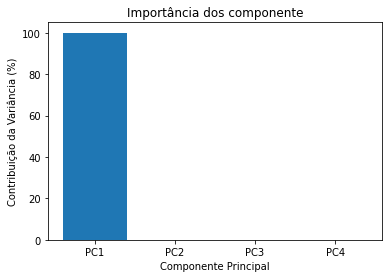

In [ ]:
plt.bar(x = range(1, len(percent_var) + 1), height = percent_var,tick_label = labels)
plt.ylabel("Contribuição da Variância (%)")
plt.xlabel("Componente Principal")
plt.title("Importância dos componente")


In [ ]:
import seaborn as sns

#PCA com Imagem

Importar as Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

Agora vamos ler a Imagem

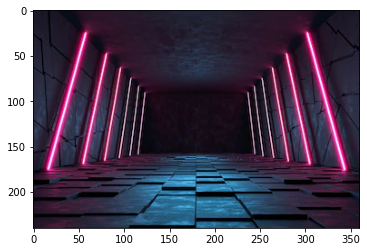

In [ ]:
img = cv2.cvtColor(cv2.imread('fundo1.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(240, 360, 3)

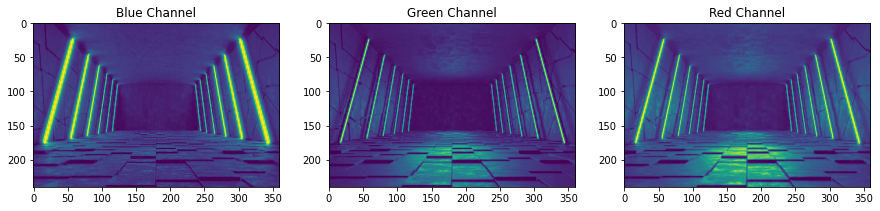

In [ ]:
#Dividindo as canais
blue,green,red = cv2.split(img)
# Plotando as imagens
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

Vamos verificar o canal blue

In [ ]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,27,27,27,27,27,27,27,27,23,23,...,27,27,24,24,27,28,28,28,28,28
1,27,27,27,27,27,27,27,27,23,23,...,27,27,24,24,27,28,28,28,28,28
2,27,27,27,27,27,27,27,27,24,23,...,27,27,24,24,27,28,28,28,28,28
3,27,27,27,27,27,27,27,27,24,23,...,27,27,24,24,27,28,28,28,28,28
4,27,27,27,27,27,27,27,27,24,23,...,28,28,26,27,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,35,36,36,38,44,44,46,46,47,47,...,46,42,45,43,41,40,42,41,40,38
236,32,32,34,34,38,38,39,39,38,36,...,47,47,46,46,45,43,41,39,38,35
237,32,32,34,34,36,36,38,36,34,34,...,41,41,42,42,40,39,37,34,32,30
238,37,37,35,35,38,38,36,36,36,39,...,30,30,32,33,32,32,30,29,26,25


Fit e transforme e reconstrução o dado em pca

In [ ]:
pca_b = PCA(n_components=50)
pca_b.fit(blue)
trans_pca_b = pca_b.transform(blue)
inverse_trans_pca_b = pca_b.inverse_transform(trans_pca_b)

pca_g = PCA(n_components=50)
pca_g.fit(green)
trans_pca_g = pca_g.transform(green)
inverse_trans_pca_g = pca_g.inverse_transform(trans_pca_g)

pca_r = PCA(n_components=50)
pca_r.fit(red)
trans_pca_r = pca_r.transform(red)
inverse_trans_pca_r = pca_r.inverse_transform(trans_pca_r)

In [ ]:
img_reduced = (np.dstack((inverse_trans_pca_b, inverse_trans_pca_g, inverse_trans_pca_r))).astype(np.uint8)


#Matriz de Covariância

In [ ]:
cov_matrix_b = np.cov(blue)
cov_matrix_b

array([[ 96.17993655,  94.227329  ,  94.14341535, ..., -50.95810121,
        -36.50545497, -35.80725781],
       [ 94.227329  ,  93.64667286,  94.37062829, ..., -45.79489322,
        -31.03166202, -31.65564841],
       [ 94.14341535,  94.37062829,  97.25885949, ..., -44.70833333,
        -29.28911328, -29.0780718 ],
       ...,
       [-50.95810121, -45.79489322, -44.70833333, ..., 375.07179666,
        353.21803621, 277.19298979],
       [-36.50545497, -31.03166202, -29.28911328, ..., 353.21803621,
        373.33642061, 297.37126277],
       [-35.80725781, -31.65564841, -29.0780718 , ..., 277.19298979,
        297.37126277, 293.14760136]])

In [ ]:
cov_matrix_g = np.cov(green)
cov_matrix_g

array([[  57.57807954,   54.64163572,   54.2344398 , ...,   71.78569328,
          64.51954503,   63.35551687],
       [  54.64163572,   52.61076292,   52.52139431, ...,   67.41136645,
          60.36884865,   58.73495048],
       [  54.2344398 ,   52.52139431,   53.29302847, ...,   69.75291705,
          62.12901578,   59.41800526],
       ...,
       [  71.78569328,   67.41136645,   69.75291705, ..., 1128.89135716,
        1054.48389044,  988.78095791],
       [  64.51954503,   60.36884865,   62.12901578, ..., 1054.48389044,
        1026.76072423,  959.21202414],
       [  63.35551687,   58.73495048,   59.41800526, ...,  988.78095791,
         959.21202414,  952.74743887]])

In [ ]:
cov_matrix_r = np.cov(red)
cov_matrix_r

array([[  88.76229496,   85.63127515,   83.00745125, ...,  121.03623491,
          87.65198855,   71.08648251],
       [  85.63127515,   83.50266171,   81.30487465, ...,  113.90004643,
          80.99506345,   64.11419065],
       [  83.00745125,   81.30487465,   80.5152507 , ...,  113.57931755,
          81.33279944,   64.33850975],
       ...,
       [ 121.03623491,  113.90004643,  113.57931755, ..., 1635.65731198,
        1602.03010678, 1546.70155525],
       [  87.65198855,   80.99506345,   81.33279944, ..., 1602.03010678,
        1665.01633395, 1626.10932374],
       [  71.08648251,   64.11419065,   64.33850975, ..., 1546.70155525,
        1626.10932374, 1658.19924946]])

#Autovetores e Autovalores

In [ ]:
autoValor_b, autoVetor_b = np.linalg.eig(cov_matrix_b)
autoValor_g, autoVetor_g = np.linalg.eig(cov_matrix_g)
autoValor_r, autoVetor_r = np.linalg.eig(cov_matrix_r)

Autovalor e autovetor da Blue

In [ ]:
autoValor_b

array([1.21586555e+05, 9.84811030e+04, 7.72208378e+04, 4.05069688e+04,
       3.55603710e+04, 1.97672339e+04, 1.42121772e+04, 1.06811908e+04,
       6.74675636e+03, 6.22441275e+03, 5.41679544e+03, 5.11981419e+03,
       4.38372963e+03, 4.08401905e+03, 3.49910609e+03, 3.15528309e+03,
       2.92655168e+03, 2.55432701e+03, 2.46264288e+03, 2.28583729e+03,
       1.92300261e+03, 1.47857021e+03, 1.20277304e+03, 1.11200925e+03,
       9.42635788e+02, 9.12003849e+02, 8.69846838e+02, 7.13859869e+02,
       5.97744656e+02, 5.09898185e+02, 4.63209183e+02, 4.13313586e+02,
       3.39940896e+02, 3.31338156e+02, 3.19742799e+02, 2.90749880e+02,
       2.88995166e+02, 2.40276449e+02, 2.39614825e+02, 2.29587780e+02,
       2.19335178e+02, 2.12569335e+02, 2.00981093e+02, 1.83410902e+02,
       1.80082487e+02, 1.67335526e+02, 1.60176296e+02, 1.53285665e+02,
       1.39861199e+02, 1.35273110e+02, 1.23505950e+02, 1.19951390e+02,
       1.17497804e+02, 1.10308329e+02, 1.07515199e+02, 1.04356736e+02,
      

In [ ]:
autoVetor_b

array([[-0.005552  ,  0.00694936,  0.00062299, ..., -0.08209853,
        -0.02443393,  0.00373905],
       [-0.0043139 ,  0.00717066,  0.00141233, ..., -0.10341008,
         0.00848118,  0.04279124],
       [-0.0034046 ,  0.00799576,  0.00134921, ...,  0.00409372,
        -0.02837386,  0.05245281],
       ...,
       [ 0.02757493,  0.00095987,  0.00769971, ...,  0.00713004,
        -0.07245737, -0.03583192],
       [ 0.02766175,  0.00170113,  0.00886738, ..., -0.05333143,
         0.11202713, -0.00610236],
       [ 0.02334419,  0.0060563 ,  0.00419511, ...,  0.07980416,
        -0.03104687, -0.0175877 ]])

Autovalor e autovetor da Green

In [ ]:
autoValor_g

array([9.13677127e+04, 1.75984014e+04, 1.49042910e+04, 1.41133048e+04,
       1.34667183e+04, 1.28444179e+04, 1.20828144e+04, 1.12622099e+04,
       1.04047004e+04, 9.46715554e+03, 8.24932614e+03, 7.84464302e+03,
       6.67173966e+03, 6.36522156e+03, 5.82048609e+03, 5.23088876e+03,
       4.34552890e+03, 4.05453657e+03, 3.18698999e+03, 3.03009051e+03,
       2.35156655e+03, 2.18011102e+03, 2.03607474e+03, 1.78822718e+03,
       1.69526716e+03, 1.38009295e+03, 1.24650830e+03, 1.17148530e+03,
       1.08971669e+03, 1.05407372e+03, 8.60914718e+02, 7.74019243e+02,
       7.64718330e+02, 6.83688324e+02, 6.25002950e+02, 5.99887854e+02,
       5.32846128e+02, 5.17313411e+02, 5.06879668e+02, 4.97792273e+02,
       4.30260178e+02, 3.85456925e+02, 3.45570795e+02, 3.42869902e+02,
       3.19254036e+02, 2.86340273e+02, 2.68699705e+02, 2.65764819e+02,
       2.48295855e+02, 2.39280412e+02, 2.19115653e+02, 2.00474902e+02,
       1.91212435e+02, 1.73061154e+02, 1.58442120e+02, 1.55405669e+02,
      

In [ ]:
autoVetor_g

array([[ 2.26594352e-02, -2.49048446e-04, -1.71392988e-03, ...,
        -6.67542895e-02,  1.75070260e-01,  9.67660611e-02],
       [ 2.16380145e-02, -6.81206514e-04, -1.49244061e-04, ...,
        -4.98954254e-02,  1.28573324e-01,  5.68090589e-02],
       [ 2.15351656e-02, -1.63120878e-03,  4.69083279e-04, ...,
         3.59225230e-02,  5.13046336e-03,  1.02514734e-02],
       ...,
       [ 2.82096032e-02, -1.87085287e-01, -8.12134382e-02, ...,
        -9.44386311e-02, -5.45500540e-02, -8.61143963e-02],
       [ 2.43326838e-02, -1.77128843e-01, -7.83831518e-02, ...,
         1.29341557e-01,  3.39163745e-02,  8.79100374e-02],
       [ 2.33698401e-02, -1.68645131e-01, -7.38682306e-02, ...,
        -9.83780667e-02,  1.14796526e-02, -4.13913376e-02]])

Autovalor e autovetor da Red

In [ ]:
autoValor_r

array([1.61477290e+05, 3.68314570e+04, 3.11652128e+04, 2.75915600e+04,
       2.14138077e+04, 2.02718819e+04, 1.53317794e+04, 1.26842582e+04,
       1.21895650e+04, 1.11385436e+04, 1.01540407e+04, 9.41073289e+03,
       8.67830104e+03, 7.70734061e+03, 6.53449464e+03, 5.94130234e+03,
       5.12784182e+03, 4.32378483e+03, 3.31449525e+03, 3.22812488e+03,
       2.94324712e+03, 2.73317252e+03, 2.36155194e+03, 1.94074609e+03,
       1.66375806e+03, 1.59328826e+03, 1.37220647e+03, 1.20739974e+03,
       1.04556397e+03, 9.63644578e+02, 9.06421488e+02, 8.10256732e+02,
       7.65586790e+02, 7.17776106e+02, 6.54016800e+02, 5.79933130e+02,
       5.39497346e+02, 5.12070829e+02, 4.73739874e+02, 4.61705123e+02,
       4.39296389e+02, 4.37269320e+02, 3.93028219e+02, 3.62349083e+02,
       3.26921239e+02, 2.97980671e+02, 2.87337137e+02, 2.84498671e+02,
       2.67099336e+02, 2.43025973e+02, 2.20455239e+02, 2.18704346e+02,
       2.10714077e+02, 1.93843620e+02, 1.77899442e+02, 1.68779010e+02,
      

In [ ]:
autoVetor_r

array([[-0.01963955, -0.00028548, -0.00427624, ...,  0.00444864,
        -0.00355686, -0.00055212],
       [-0.0187938 , -0.00154486, -0.00421636, ...,  0.05635738,
         0.03667521,  0.07703461],
       [-0.01809285, -0.00326335, -0.0049192 , ...,  0.00886643,
        -0.01043745,  0.02399988],
       ...,
       [-0.02870888, -0.03495172,  0.0474484 , ..., -0.03070628,
         0.04397257, -0.08188058],
       [-0.01661822, -0.03545375,  0.05227051, ...,  0.03979363,
        -0.02593091,  0.09121774],
       [-0.01229014, -0.0366791 ,  0.05146065, ..., -0.03152834,
        -0.00697862, -0.05428919]])

#Variâcia explicada de acordo com a quantidade de autovetores

In [ ]:
pca_b.explained_variance_

array([149243.75263926, 146851.7291484 ,  97365.13570632,  60482.00907499,
        49563.07181682,  30035.41403974,  21767.40455247,  16788.16074093,
        10819.06236781,   9337.13287898,   8255.19327328,   7708.43817418,
         6586.08616854,   6019.0416933 ,   5252.28884086,   4800.58544751,
         4436.87484836,   4353.2477096 ,   3762.40277015,   3660.28683053,
         3143.35433721,   2525.07512296,   1912.5478957 ,   1789.05531261,
         1652.12882677,   1375.77159499,   1280.75605161,   1146.18397775,
          916.5165957 ,    810.60485697,    725.72957371,    640.28519277,
          521.39167606,    504.77859407,    480.87916495,    454.37118248,
          432.07308946,    363.93987438,    354.75837596,    351.7861049 ,
          330.37973442,    327.75256777,    308.95586582,    301.18866604,
          270.38243055,    263.28949001,    240.24020622,    233.2952145 ,
          212.88465994,    208.23051335])

In [ ]:
pca_g.explained_variance_

array([156522.11607256,  37482.87912615,  26240.20196023,  21769.40875805,
        20518.9603448 ,  19302.1155448 ,  18767.33415791,  17552.1984353 ,
        16708.41900083,  15096.33936933,  13914.06026943,  12340.57532587,
        10630.87574617,   9608.72955382,   8949.40787058,   7963.58555574,
         6511.6708174 ,   6077.38372453,   5274.14991943,   4390.48700717,
         4054.61431937,   3353.40440845,   3100.46982334,   2674.00887957,
         2605.79303588,   2281.24979481,   1903.13014446,   1843.16321697,
         1625.04552378,   1568.26136634,   1301.02322662,   1194.45461451,
         1160.13414512,   1046.27633471,    978.4926293 ,    913.47269097,
          839.3958552 ,    788.05630759,    751.84198882,    740.78117741,
          640.59809361,    579.93084078,    522.22299836,    515.43543653,
          481.82940521,    436.67230849,    421.31002261,    397.97411395,
          381.04863877,    353.0307157 ])

In [ ]:
pca_r.explained_variance_

array([268858.0286398 ,  68560.39369002,  54662.0379859 ,  44363.9504389 ,
        37558.90296514,  32100.26390433,  28353.34973652,  19304.71187661,
        18504.53644969,  16399.3003973 ,  15783.38921074,  14097.81142581,
        13127.70744959,  10760.9152885 ,   9726.87181374,   8916.02512595,
         7880.01139974,   7550.26435057,   6274.16460848,   4886.23470184,
         4485.51104259,   4107.37568199,   3567.62785868,   2836.44258729,
         2482.47597371,   2270.91570508,   2061.10931753,   1812.07535993,
         1563.20323943,   1428.96455956,   1363.42097063,   1213.68406767,
         1154.03803665,   1078.2879921 ,    978.66169508,    874.67971713,
          828.21889862,    775.04953984,    732.05880735,    691.62517461,
          675.02307158,    656.38509013,    584.21597976,    538.02693755,
          483.22585789,    472.40771032,    442.09213426,    417.0953416 ,
          393.46073021,    361.64581276])

#Aplicacao da matriz de autovetores `a imagem original

Plotar

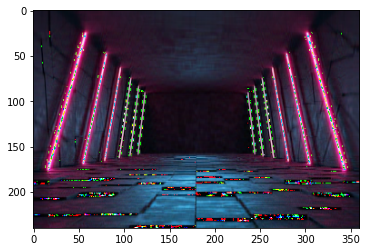

In [ ]:
plt.imshow(img_reduced)

#Gerando gráfico da variancia pra cada componente pra cada canal

In [ ]:
import matplotlib.pyplot as plt


Canal Azul

In [ ]:
#Informação em % de quano cada coponente influencia na variancia
percent_var_b = np.round(pca_b.explained_variance_ratio_ *100, decimals=1)
#label de cada componente
labels_b = ['P' + str(x) for x in range(1, len(percent_var_b)+ 1)]

print(percent_var_b)
print(labels_b)


[22.1 21.7 14.4  8.9  7.3  4.4  3.2  2.5  1.6  1.4  1.2  1.1  1.   0.9
  0.8  0.7  0.7  0.6  0.6  0.5  0.5  0.4  0.3  0.3  0.2  0.2  0.2  0.2
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.
  0.   0.   0.   0.   0.   0.   0.   0. ]
['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50']


Text(0.5, 1.0, 'Importância dos componente Canal Azul')

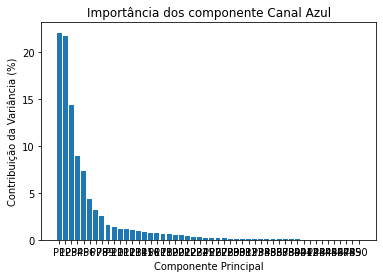

In [ ]:
plt.bar(x = range(1, len(percent_var_b) + 1), height = percent_var_b,tick_label = labels_b)
plt.ylabel("Contribuição da Variância (%)")
plt.xlabel("Componente Principal")
plt.title("Importância dos componente Canal Azul")


Canal Verde

In [ ]:
percent_var_g = np.round(pca_g.explained_variance_ratio_ *100, decimals=1)
#label de cada componente
labels_g = ['PC' + str(x) for x in range(1, len(percent_var_g)+ 1)]

print(percent_var_g)
print(labels_g)

[32.5  7.8  5.4  4.5  4.3  4.   3.9  3.6  3.5  3.1  2.9  2.6  2.2  2.
  1.9  1.7  1.4  1.3  1.1  0.9  0.8  0.7  0.6  0.6  0.5  0.5  0.4  0.4
  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50']


Text(0.5, 1.0, 'Importância dos componente do Canal Verde')

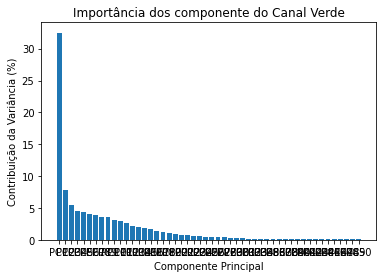

In [ ]:
plt.bar(x = range(1, len(percent_var_g) + 1), height = percent_var_g,tick_label = labels_g)
plt.ylabel("Contribuição da Variância (%)")
plt.xlabel("Componente Principal")
plt.title("Importância dos componente do Canal Verde")


Canal Vermelho

In [ ]:
percent_var_r = np.round(pca_r.explained_variance_ratio_ *100, decimals=1)
#label de cada componente
labels_r = ['PC' + str(x) for x in range(1, len(percent_var_r)+ 1)]

print(percent_var_r)
print(labels_r)

[36.5  9.3  7.4  6.   5.1  4.4  3.8  2.6  2.5  2.2  2.1  1.9  1.8  1.5
  1.3  1.2  1.1  1.   0.9  0.7  0.6  0.6  0.5  0.4  0.3  0.3  0.3  0.2
  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0. ]
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50']


Text(0.5, 1.0, 'Importância dos componente do Canal Vermelho')

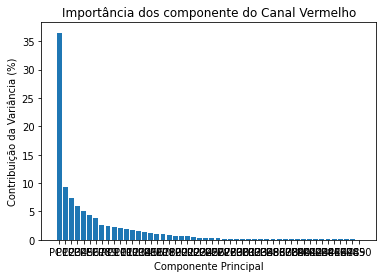

In [ ]:
plt.bar(x = range(1, len(percent_var_r) + 1), height = percent_var_r,tick_label = labels_r)
plt.ylabel("Contribuição da Variância (%)")
plt.xlabel("Componente Principal")
plt.title("Importância dos componente do Canal Vermelho")


#Apresente a matriz de dados projetada no novo espa ̧co gerado pelas componentes principais

In [ ]:
pca_b = PCA(n_components=90)
pca_b.fit(blue)
trans_pca_b = pca_b.transform(blue)
inverse_trans_pca_b = pca_b.inverse_transform(trans_pca_b)

pca_g = PCA(n_components=90)
pca_g.fit(green)
trans_pca_g = pca_g.transform(green)
inverse_trans_pca_g = pca_g.inverse_transform(trans_pca_g)

pca_r = PCA(n_components=90)
pca_r.fit(red)
trans_pca_r = pca_r.transform(red)
inverse_trans_pca_r = pca_r.inverse_transform(trans_pca_r)

In [ ]:
img_reduced = (np.dstack((inverse_trans_pca_b, inverse_trans_pca_g, inverse_trans_pca_r))).astype(np.uint8)

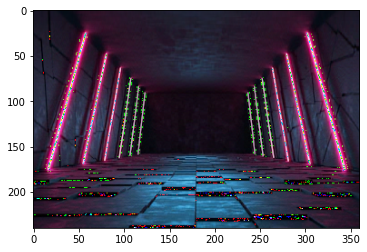

In [ ]:
plt.imshow(img_reduced)

In [ ]:
pca_b = PCA(n_components=4)
pca_b.fit(blue)
trans_pca_b = pca_b.transform(blue)
inverse_trans_pca_b = pca_b.inverse_transform(trans_pca_b)

pca_g = PCA(n_components=4)
pca_g.fit(green)
trans_pca_g = pca_g.transform(green)
inverse_trans_pca_g = pca_g.inverse_transform(trans_pca_g)

pca_r = PCA(n_components=4)
pca_r.fit(red)
trans_pca_r = pca_r.transform(red)
inverse_trans_pca_r = pca_r.inverse_transform(trans_pca_r)

In [ ]:
img_reduced = (np.dstack((inverse_trans_pca_b, inverse_trans_pca_g, inverse_trans_pca_r))).astype(np.uint8)

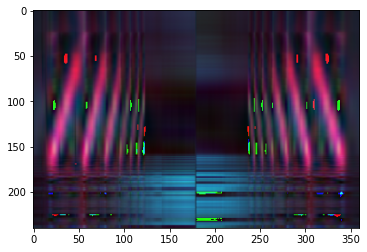

In [ ]:
plt.imshow(img_reduced)

In [ ]:
pca_b = PCA(n_components=1)
pca_b.fit(blue)
trans_pca_b = pca_b.transform(blue)
inverse_trans_pca_b = pca_b.inverse_transform(trans_pca_b)

pca_g = PCA(n_components=1)
pca_g.fit(green)
trans_pca_g = pca_g.transform(green)
inverse_trans_pca_g = pca_g.inverse_transform(trans_pca_g)

pca_r = PCA(n_components=1)
pca_r.fit(red)
trans_pca_r = pca_r.transform(red)
inverse_trans_pca_r = pca_r.inverse_transform(trans_pca_r)

In [ ]:

img_reduced = (np.dstack((inverse_trans_pca_b, inverse_trans_pca_g, inverse_trans_pca_r))).astype(np.uint8)

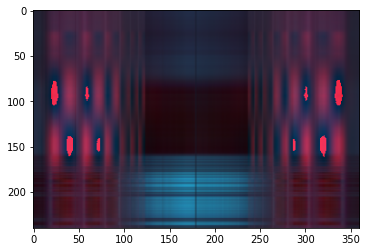

In [ ]:
plt.imshow(img_reduced)

#Referências

1. http://www.vision.ime.usp.br/~teo/publications/qualificacao/node9.html#:~:text=Para%20efetuar%20redu%C3%A7%C3%A3o%20de%20dimensionalidade,do%20conjunto%20de%20caracter%C3%ADsticas%20original.

2. https://methods.sagepub.com/reference/the-sage-encyclopedia-of-communication-research-methods/i2473.xml

3. https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202

4. https://www.statisticshowto.com/probability-and-statistics/chi-square/#chisquareqtest

5. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

6. https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

7. https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/



